# Bayesian Analysis with Python

Bayesian models are also known as probabilistic models because they are built
using probabilities.

We can summarize the Bayesian modeling process using three steps:
1. Given some data and some assumptions on how this data could have been generated, we will build models. Most of the time, models will be crude approximations, but most of the time this is all we need.
2. Then we will use Bayes' theorem to add data to our models and derive the logical consequences of mixing the data and our assumptions. We say we are conditioning the model on our data.
3. Lastly, we will check that the model makes sense according to different criteria, including our data and our expertise on the subject we are studying.

### Introduction to probability 

Probability of A and B is equal to the probability of A given B, times the probability of B. The expression p(A, B) represents the joint probability of A and B. The expression p(A|B) is used to indicate a conditional probability; the name refers to the fact that the probability of A is conditioned on knowing B. 
$$p(A,B) = p(A|B)p(B)$$

### Probability distributions

A probability distribution is a mathematical object that describes how likely different events are. In general, these events are restricted somehow to a set of possible events. A common and useful conceptualization in statistics is to think that data was generated from some probability distribution with unobserved parameters. Since the parameters are unobserved and we only have data, we will use Bayes' theorem to invert the relationship, that is, to go from the data to the parameters. 
Probability distributions are the building blocks of Bayesian models; by combining them in proper ways we can get useful complex models.


A variable x,  is distributed as a Gaussian or normal distribution with parameters µ and σ is as follows:
$$x \sim N(\mu,\sigma )$$

Probably the most common probability distributions is the Gaussian or normal distribution. A variable x follows a
Gaussian distribution if its values are dictated by the following formula:

$$pdf = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-(x-\mu)^2}{2\sigma^2}$$

in which, $\mu$ and $\sigma$ are the parameters of the distributions. The first one can take any real value, that is, $ \mu \in{R}$ , and dictates the mean of the distribution (and also the median and mode, which are all equal). The second is the standard deviation, which can only be positive and dictates the spread of the distribution. Since there are an infinite number of possible combinations of µ and σ values, there is an infinite number of instances of the Gaussian distribution and all of them belong to the same Gaussian family. Mathematical formulas are concise and unambiguous and some people say even beautiful, but we must admit that meeting them can be intimidating; a good way to break the ice is to use Python to explore them. Let's see what the Gaussian distribution family looks like:


A variable x,  is distributed as a Gaussian or normal distribution with parameters µ and σ is as follows:
$$x \sim N(\mu,\sigma )$$
To illustrate this point, we use the data from 

### Bayes' theorem and statistical inference

According to the product rule, we have the following:
$$p(A,B) = p(A|B)p(B) = p(B|A)p(A) $$
Thus, we get Bayes' theorem:
$$p(A|B) = \frac{p(B|A)p(A)}{p(B)}$$

In above equations, 
+ p(A): Prior
+ p(B|A): Likelihood
+ p(A|B): Posterior
+ p(B): Evidence

+ The **prior** distribution reflects what we know about the value of some parameter before seeing the data B. If we know nothing, we will use flat priors. 
+ The **likelihood** * is an expression of the plausibility of the data given the parameters.
+ The **posterior** distribution is the result of the Bayesian analysis and contains all the information about our parameters according to the data and the model. This distribution is a balance of the prior and the likelihood. 



As well, we can also rewrite the Bayes's Theorem as a proportionality: 
 $$p(A|B)    \ \infty  \ p(B|A)p(A)$$
 
 
 
 


### The coin-flipping problem

The coin-flip problem is a classical problem in statistics. We toss a coin a number of times and record how many heads and tails we get. We can use the random variable, y, to denote the outcome and assign it to 1 if it is heads and 0 if it is tails. 


we can represent the probability of getting a head as $\theta$ as:
$$p(y=1|\theta)=\theta$$


It then follows that the probability of getting a tail is:
$$p(y=0|\theta)=1-\theta$$

Combining the two last expressions, we obtain the follows: 

$$p(y|\theta)=\theta^y(1-\theta)^{1-y}$$

Generalizing the last formula, we have: 

$$p(y|\theta)   = \frac{N!}{N!(N-y)!} \theta^y(1-\theta)^{N-y}$$

This is binomial distribution. 







Based on Baysesian's theorem, we have the following formula: 
$$p(\theta|y)    \ \infty  \ p(y|\theta)p(\theta)$$

The likelihood is the binomial distribution:
$$p(y|\theta)   = \frac{N!}{N!(N-y)!} \theta^y(1-\theta)^{N-y}$$


The following code generates 9 binomial distributions; each subplot has its own legend indicating the corresponding parameters:

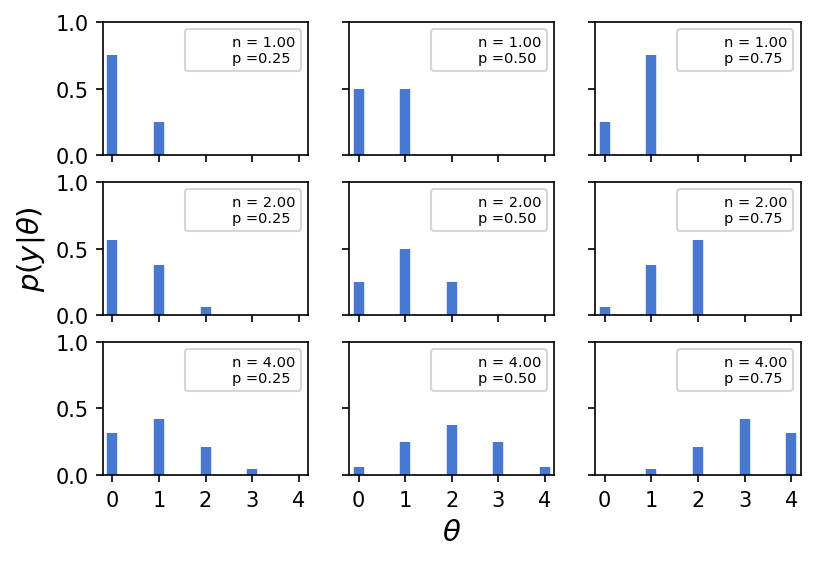

In [66]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params)+1)
f, ax = plt.subplots(len(n_params), len(p_params), sharex=True,
sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='b', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\np ={:3.2f}".format(n, p), alpha=0)
        ax[i,j].legend(fontsize=7)
ax[2,1].set_xlabel('$\\theta$', fontsize=14)
ax[1,0].set_ylabel('$p(y|\\theta)$', fontsize=14)
ax[0,0].set_xticks(x)
#ax[0,0].title("Likelihood")

As a prior we will use a beta distribution, which is a very common distribution in Bayesian statistics and looks like this:
   


$$p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1}$$
    
    
There are many reasons to use a beta distribution for solving this problem:
One of them is that the beta distribution is restricted to be between 0 and 1, in the same way our parameter θ is. Another reason is Beta are Gaussian-like distributions, U-like distributions. A third reason is that the beta distribution is the conjugate prior of the binomial distribution. 

Text(0, 0.5, '$p(\\theta)$')

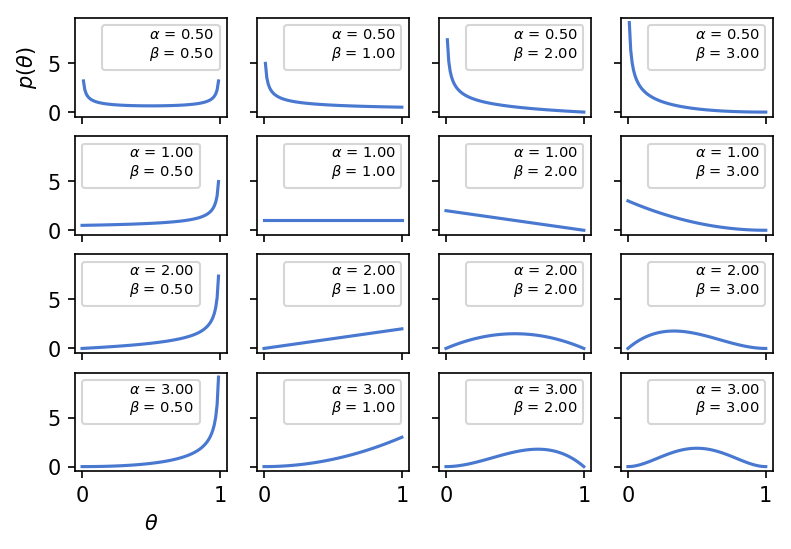

In [37]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True,
sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=7)
ax[3,0].set_xlabel('$\\theta$', fontsize=10)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=10)

### Posterior
Let's remember Bayes' theorem says that the posterior is proportional to the likelihood times the prior:
\begin{equation}
p(\theta|y)    \ \infty  \ p(y|\theta)p(\theta)
\end{equation}
Replace the likelihood and the prior with the assummed distribution, we get the posteorior distribution as the follows:



$$p(\theta|y) \ \infty \frac{N!}{N!(N-y)!} \theta^y(1-\theta)^{N-y} \ \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1}$$

For the sake of simplicity, we can drop the terms that do not depend on $\theta$, then, we can write the following:
    $$p(\theta|y) \ \infty  \ \theta^y(1-\theta)^{N-y} \ \theta^{\alpha - 1}(1 - \theta)^{\beta - 1}$$
    
Reordering it and we obtain the following:
 $$p(\theta|y) \ \infty  \ \theta^{\alpha - 1 + y}(1-\theta)^{\beta - 1+ N-y} $$
 
We can observe that this distribution has the functional form of beta distribution with: 
$$\alpha_{posterior} = \alpha_{prior} + y \ ; \ \beta_{posterior} = \beta_{prior} + N - y$$
which means that the the posterior for our problem is the beta distribution:
$$p(\theta|y)  =  Beta(\alpha_{prior}  + y, \beta_{prior} + N - y)$$

Now we use Python to compute and plot the **posterior**

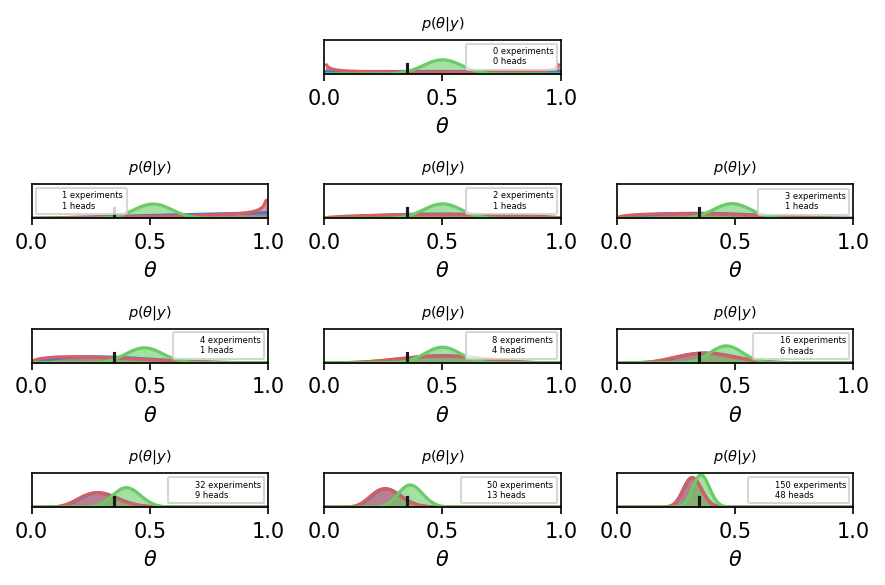

<Figure size 900x600 with 0 Axes>

In [67]:
import numpy as np
from scipy import stats
plt.rcParams['figure.dpi'] = 150
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N, y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r"$\theta$") 
    plt.ylabel(r"$p(\theta|y)$")  
    plt.legend(prop={'size': 4})
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.title(r"$p(\theta|y)$", size = 7)
plt.tight_layout()

plt.show()

plt.savefig('B04958_01_05.png', dpi=300, figsize=(20, 20))

On the first line we have 0 experiments done, hence these curves are just the priors. 
We have three curves, one per prior:
• The blue one is a uniform prior. 
• The red one is similar to the uniform. For the sake of this example we will just say that we are a little bit more confident that the bias is either 0 or 1 than the rest of the values.
• The green and last one is centered and concentrated around 0.5, so this prior is compatible with information indicating that the coin has more or less about the same chance of landing heads or tails. We could also say this prior is compatible with the belief that most coins are fair. 

Subplots show posteriors **$p(\theta|y)$** for successive experiments.Posteriors as updated priors given the data. The number of experiments (or coin tosses) and the number of heads are indicated in each subplot's legend. There is also a black vertical line (at 0.35) representing the true value for θ





